## **0. Introduction**

This notebook follows after the "General Linear Model.iypnb" notebook. Aim of this notebook is to conduct the support vector machine. For now, we have 26 z-maps, so one for each contrast, for each session, i.e. 4 * 26 z-maps. We will train the SVM on two sessions and then test the SVM on the remaining two sessions.

## **1. Masking**

First we will need to load the mask. The masks needs to be fetched from the openneuro dataset. This is done with *datalad*.

We cd into the local dataset directory and then use the command:

datalad get sourcedata/sub-01/anat.

The masks are bi-lateral organised, meaning one mask per hemisphere. For starters, the higher visual cortex (HVC) will be the first mask.

In [1]:
import os

os.chdir("/home/jpauli/ds001506/sourcedata/sub-01/anat")
os.listdir()

['sub-01_mask_LH_FFA.nii.gz',
 'sub-01_mask_LH_hV4.nii.gz',
 'sub-01_mask_LH_HVC.nii.gz',
 'sub-01_mask_LH_LOC.nii.gz',
 'sub-01_mask_LH_PPA.nii.gz',
 'sub-01_mask_LH_V1d.nii.gz',
 'sub-01_mask_LH_V1v.nii.gz',
 'sub-01_mask_LH_V2d.nii.gz',
 'sub-01_mask_LH_V2v.nii.gz',
 'sub-01_mask_LH_V3d.nii.gz',
 'sub-01_mask_LH_V3v.nii.gz',
 'sub-01_mask_RH_FFA.nii.gz',
 'sub-01_mask_RH_hV4.nii.gz',
 'sub-01_mask_RH_HVC.nii.gz',
 'sub-01_mask_RH_LOC.nii.gz',
 'sub-01_mask_RH_PPA.nii.gz',
 'sub-01_mask_RH_V1d.nii.gz',
 'sub-01_mask_RH_V1v.nii.gz',
 'sub-01_mask_RH_V2d.nii.gz',
 'sub-01_mask_RH_V2v.nii.gz',
 'sub-01_mask_RH_V3d.nii.gz',
 'sub-01_mask_RH_V3v.nii.gz']

In [2]:
len(os.listdir())

22

We can see that there are 22 masks in total, 11 for each hemisphere. 

In [3]:
mask_img_path = '/home/jpauli/ds001506/sourcedata/sub-01/anat'
mask_img_L = os.path.join(mask_img_path,'sub-01_mask_LH_V1v.nii.gz')
mask_img_R = os.path.join(mask_img_path,'sub-01_mask_RH_LOC.nii.gz')

In [4]:
func_filename_path = '/mnt/c/Users/janos/git/sessions_new/z_maps_3'
func_filename =  os.path.join(func_filename_path,'03_active -1443537.0_z_map.nii.gz')
#os.chdir('/mnt/c/Users/janos/git/sessions/z_maps_2')

/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/numpy/ma/core.py:2830: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


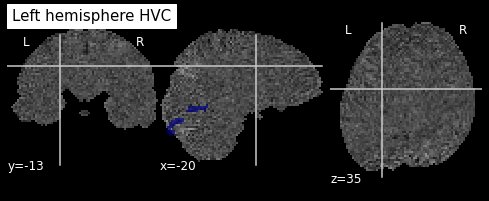

In [5]:
coordinates_func = (-20,-13,35)
from nilearn.plotting import plot_roi
plot_roi(mask_img_L, func_filename,display_mode='ortho',cut_coords=coordinates_func,
         title="Left hemisphere HVC")

Now the next step is to load in the X and Y variables. We will do this by applying Nilearns Niftimasker function on the z_maps we calculated.

In [6]:
from nilearn.maskers import NiftiMasker
nifti_masker = NiftiMasker(mask_img=mask_img_L)

This loops helps us in extracting the time series from each z-map.
Also, we append values to the Y list. We have 26 different categories we want to decode. Since there are 4 sessions in total and the categories are the same for each session, we will add a "1" for category one and so on to the Y list.

In [153]:
X = []
Y = []
Sessions = []
category = 1
for session in ["1","2","3","4"]:
    os.chdir('/mnt/c/Users/janos/git/sessions_new/z_maps_{}'.format(session))
    for x in os.listdir():
        if x == 'nilearn_cache':
            continue
        else:
            X.append(nifti_masker.fit_transform(x))
            Y.append(category)
            Y
            Sessions.append(session)
            category=category+1
            if category == 27:
                category = 1
        
            
        
        
        



In [154]:
import numpy as np
Y = np.array(Y)
Y.shape
Y

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26])

In [9]:
Y_ses = np.array(Sessions)
Y_ses

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4'],
      dtype='<U1')

In [10]:
import pandas as pd
df =  pd.DataFrame(np.concatenate(X))

In [11]:
X_ = df.to_numpy()
X_.shape

(104, 992)

## **2.0 Examing the voxel pattern**

The shape of our input array X tells us, that we have n_samples = 104 and n_features = 992.
The features relate to the amount of voxels extracted. The samples are the 26 categories multiplied by all 4 sessions.

We now want to examine the voxel pattern for different given categories and sessions. This can help with understanding the data we are dealing with.

In [12]:
X_1 = np.reshape(X_[0],(31,32))
X_11 = np.reshape(X_[25],(31,32))
X_12 = np.reshape(X_[51],(31,32))
X_13 = np.reshape(X_[77],(31,32))


X_2 = np.reshape(X_[1],(31,32))
X_21 = np.reshape(X_[26],(31,32))
X_22 = np.reshape(X_[52],(31,32))
X_23 = np.reshape(X_[78],(31,32))

X_3 = np.reshape(X_[2],(31,32))
X_31 = np.reshape(X_[27],(31,32))
X_32 = np.reshape(X_[53],(31,32))
X_33 = np.reshape(X_[79],(31,32))

X_4 = np.reshape(X_[3],(31,32))
X_41 = np.reshape(X_[28],(31,32))
X_42 = np.reshape(X_[54],(31,32))
X_43 = np.reshape(X_[80],(31,32))

Text(0.5, 0.98, 'Voxel pattern for category one for all four sessions')

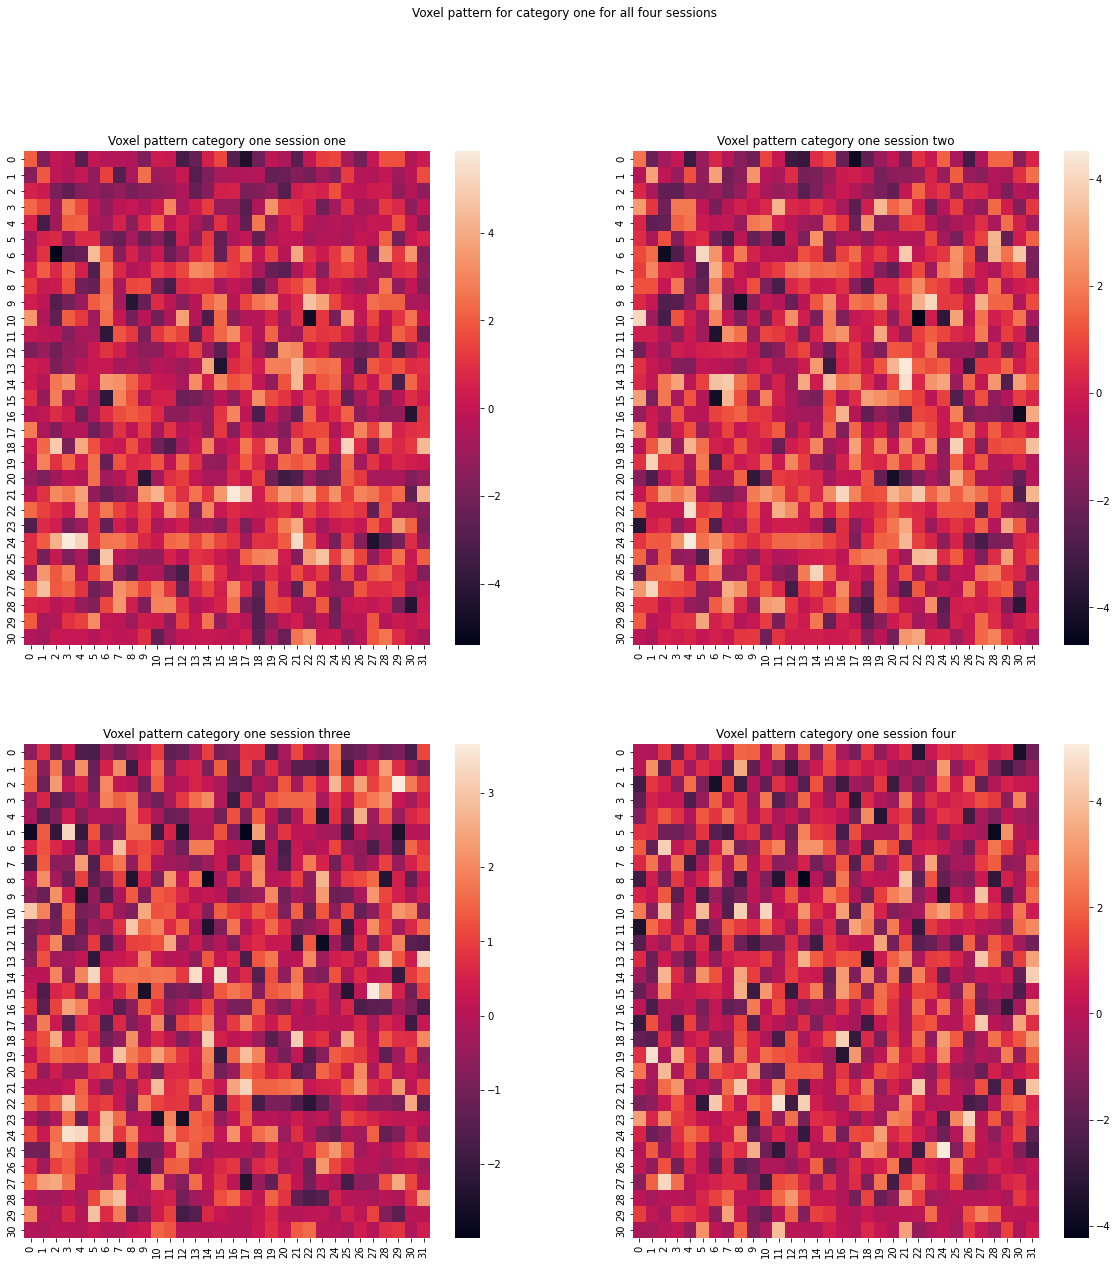

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
figure, axis = plt.subplots(2, 2,figsize=(20, 20))
im1 = sns.heatmap(X_1,ax=axis[0,0])
im2= sns.heatmap(X_11,ax=axis[0,1])
im3= sns.heatmap(X_12,ax=axis[1,0])
im4= sns.heatmap(X_13, ax=axis[1,1])

#figure.colorbar(orientation='vertical')
axis[0, 0].set_title("Voxel pattern category one session one")
axis[0, 1].set_title("Voxel pattern category one session two")
axis[1, 0].set_title("Voxel pattern category one session three")
axis[1, 1].set_title("Voxel pattern category one session four")

figure.suptitle('Voxel pattern for category one for all four sessions')

Text(0.5, 0.98, 'Voxel pattern for category two for all four sessions')

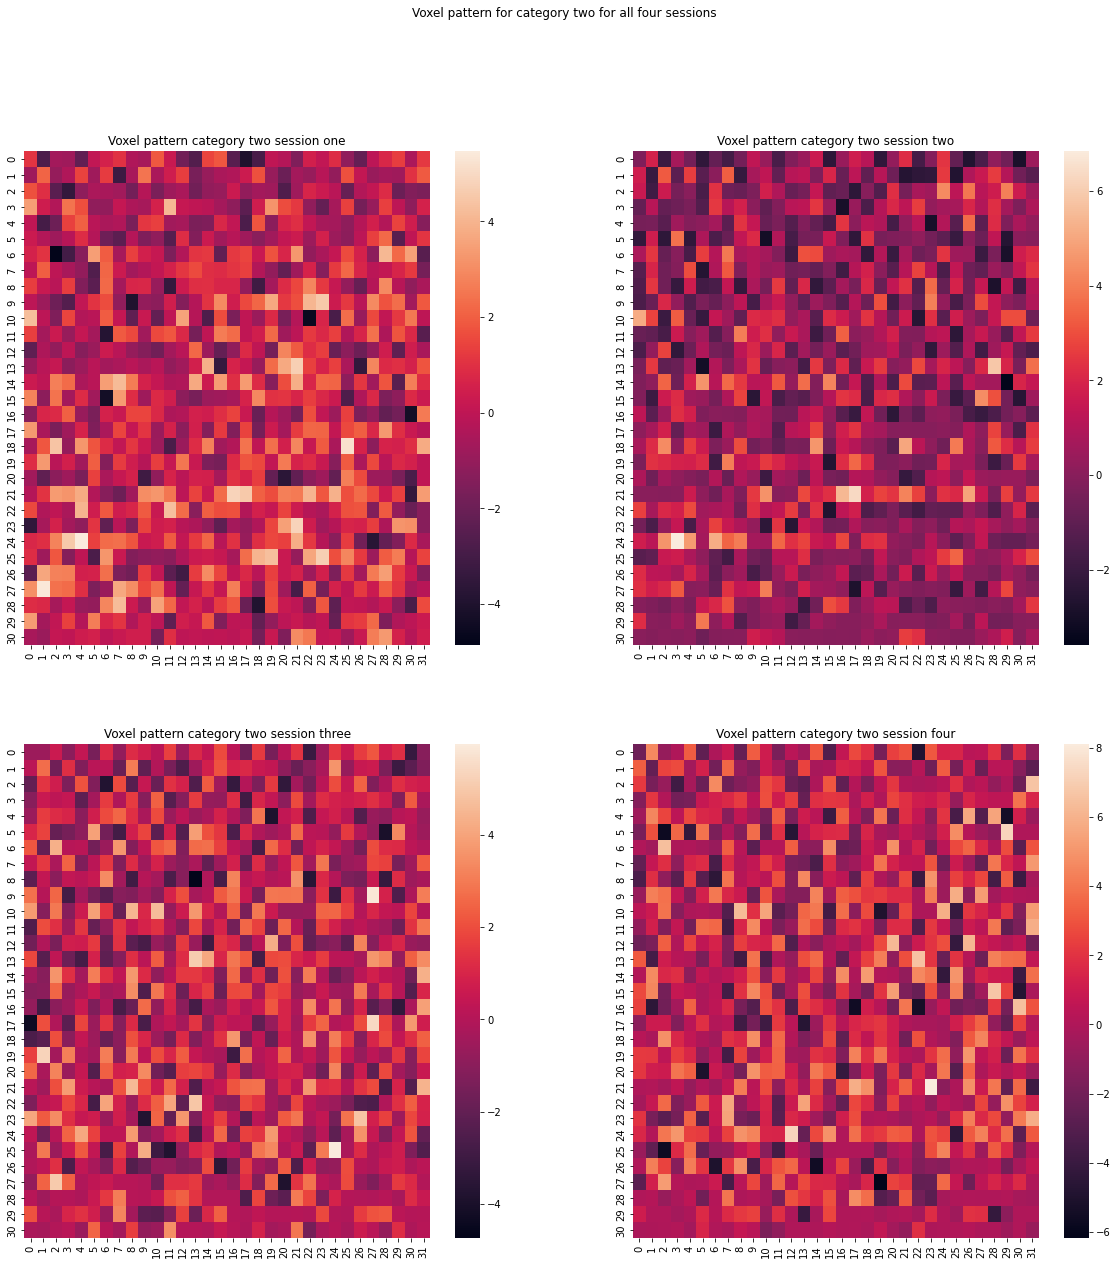

In [14]:
figure, axis = plt.subplots(2, 2,figsize=(20, 20))
im1 = sns.heatmap(X_2,ax=axis[0,0])
im2= sns.heatmap(X_21,ax=axis[0,1])
im3= sns.heatmap(X_22,ax=axis[1,0])
im4= sns.heatmap(X_23, ax=axis[1,1])

#figure.colorbar(orientation='vertical')
axis[0, 0].set_title("Voxel pattern category two session one")
axis[0, 1].set_title("Voxel pattern category two session two")
axis[1, 0].set_title("Voxel pattern category two session three")
axis[1, 1].set_title("Voxel pattern category two session four")

figure.suptitle('Voxel pattern for category two for all four sessions')

Text(0.5, 0.98, 'Voxel pattern for category three for all four sessions')

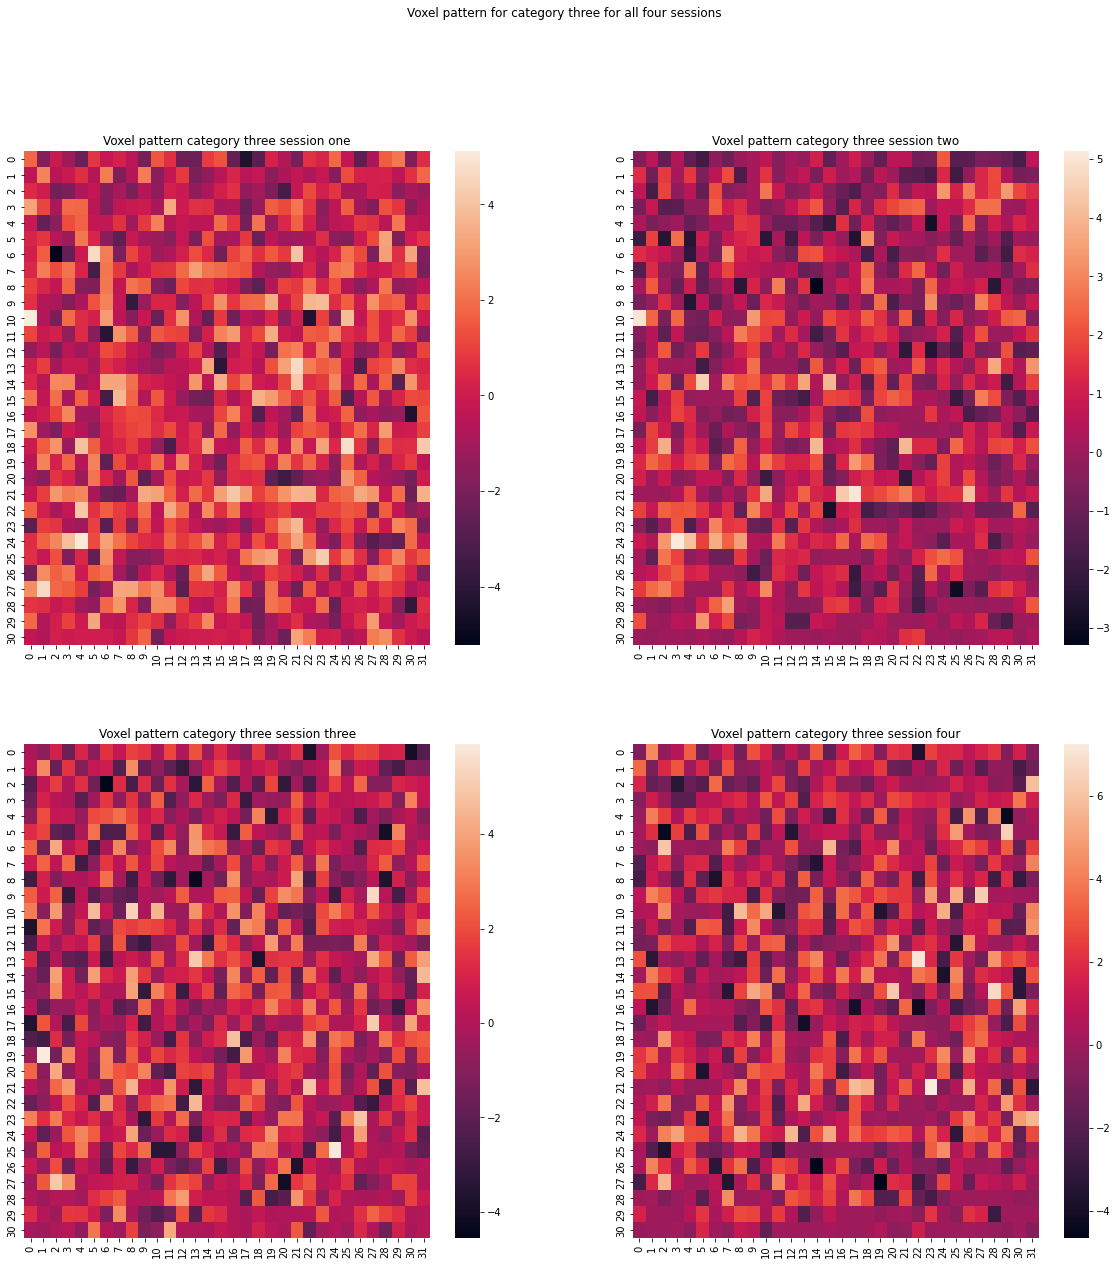

In [15]:

figure, axis = plt.subplots(2, 2,figsize=(20, 20))
im1 = sns.heatmap(X_3,ax=axis[0,0])
im2= sns.heatmap(X_31,ax=axis[0,1])
im3= sns.heatmap(X_32,ax=axis[1,0])
im4= sns.heatmap(X_33, ax=axis[1,1])

#figure.colorbar(orientation='vertical')
axis[0, 0].set_title("Voxel pattern category three session one")
axis[0, 1].set_title("Voxel pattern category three session two")
axis[1, 0].set_title("Voxel pattern category three session three")
axis[1, 1].set_title("Voxel pattern category three session four")

figure.suptitle('Voxel pattern for category three for all four sessions')

Text(0.5, 0.98, 'Voxel pattern for category four for all four sessions')

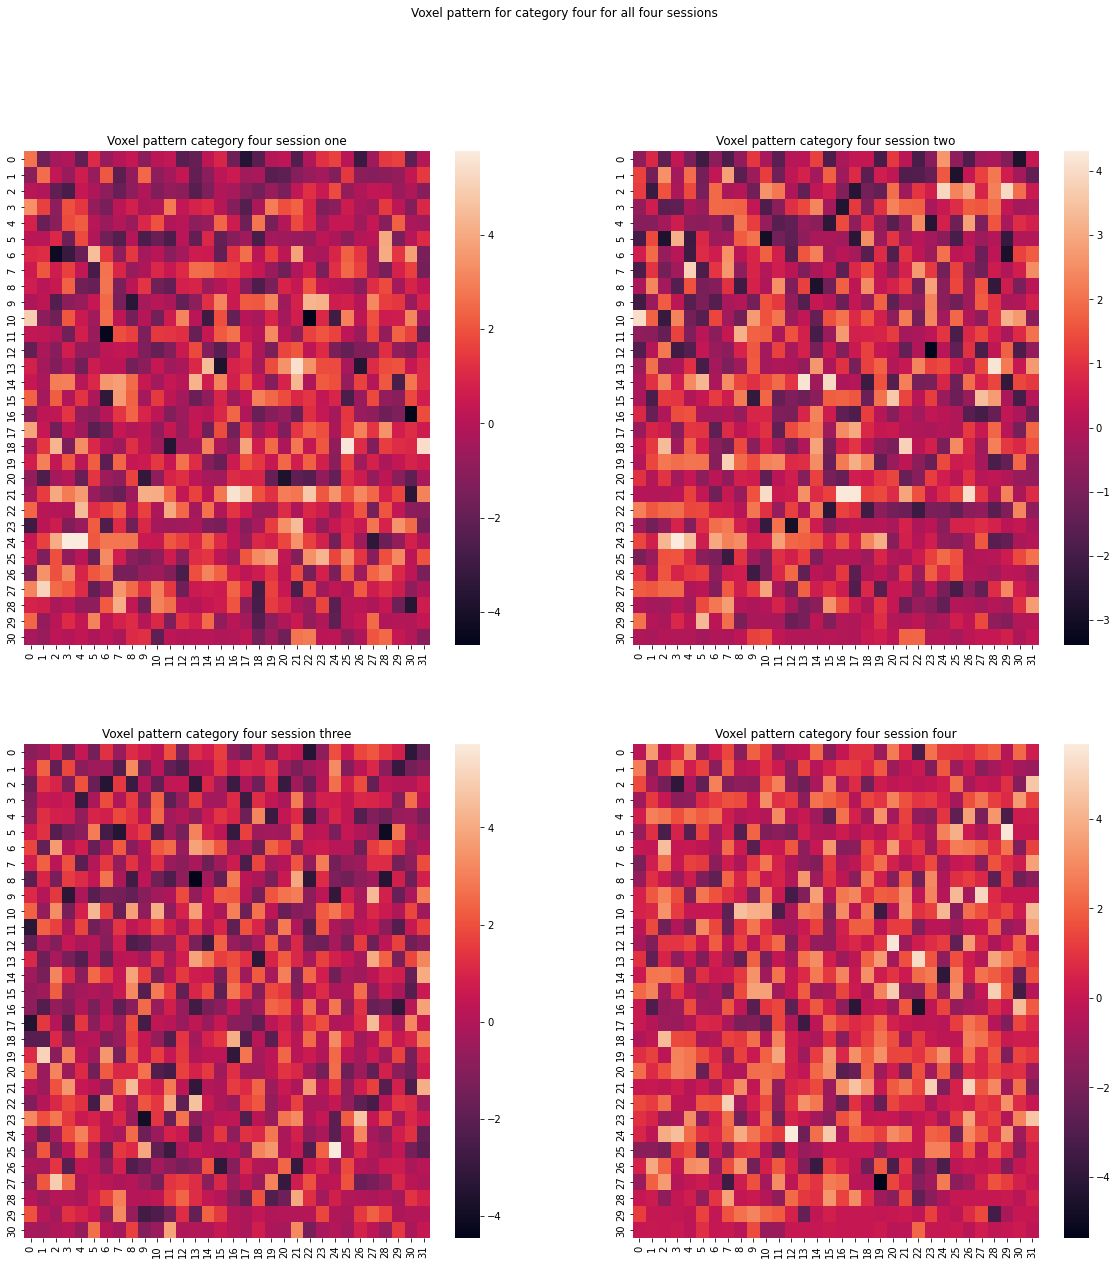

In [16]:

figure, axis = plt.subplots(2, 2,figsize=(20, 20))
im1 = sns.heatmap(X_4,ax=axis[0,0])
im2= sns.heatmap(X_41,ax=axis[0,1])
im3= sns.heatmap(X_42,ax=axis[1,0])
im4= sns.heatmap(X_43, ax=axis[1,1])

#figure.colorbar(orientation='vertical')
axis[0, 0].set_title("Voxel pattern category four session one")
axis[0, 1].set_title("Voxel pattern category four session two")
axis[1, 0].set_title("Voxel pattern category four session three")
axis[1, 1].set_title("Voxel pattern category four session four")

figure.suptitle('Voxel pattern for category four for all four sessions')

Text(0.5, 0.98, 'Voxel pattern for four different categories in session one')

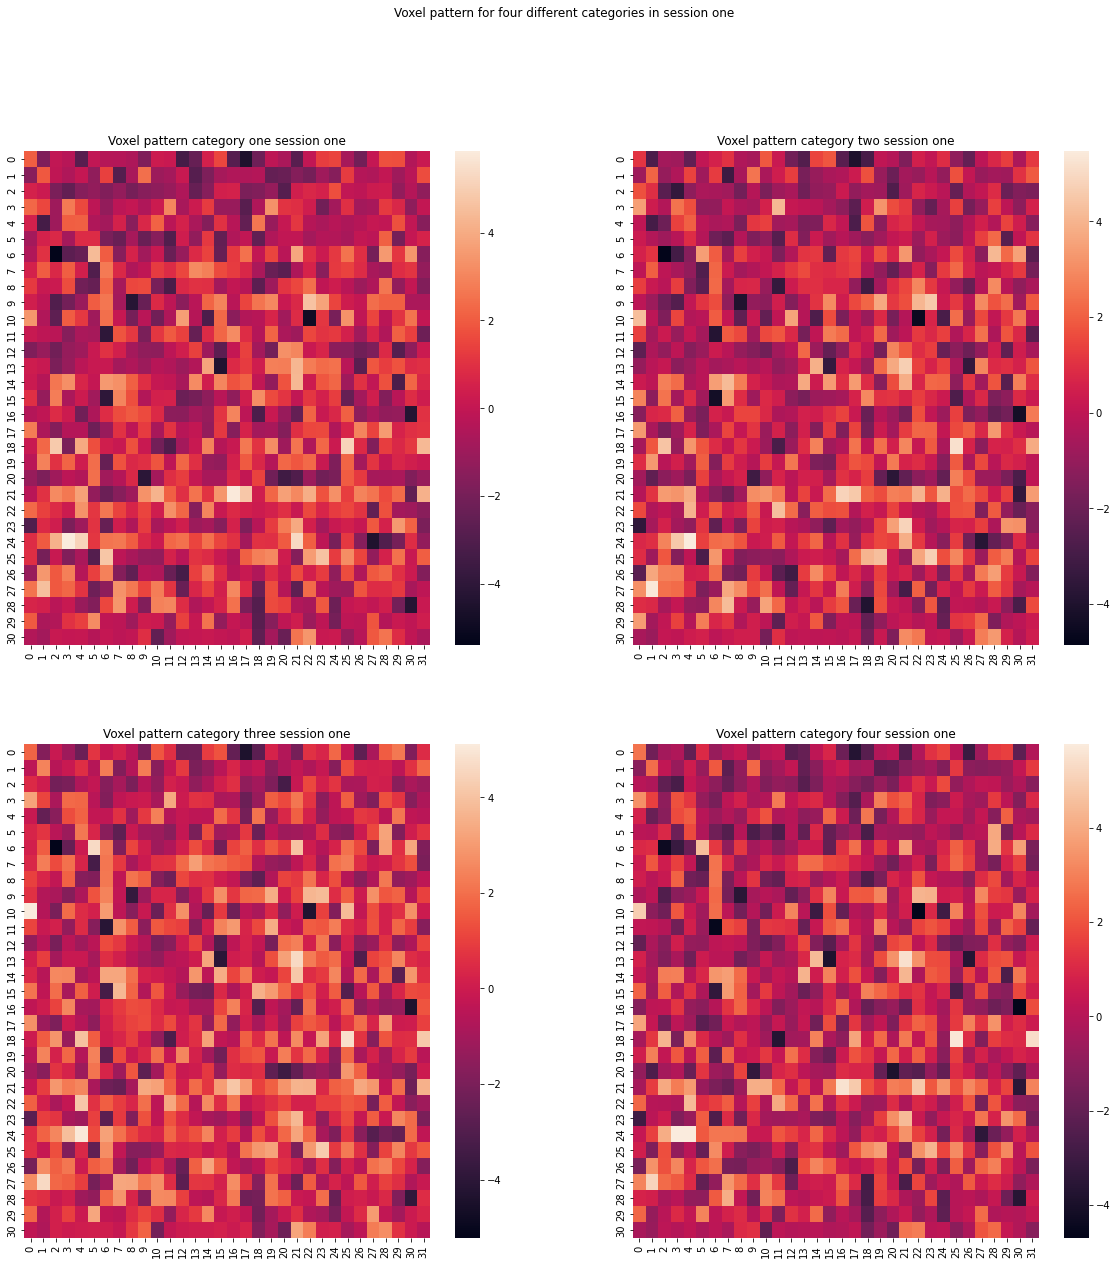

In [17]:
figure, axis = plt.subplots(2, 2,figsize=(20, 20))
im1 = sns.heatmap(X_1,ax=axis[0,0])
im2= sns.heatmap(X_2,ax=axis[0,1])
im3= sns.heatmap(X_3,ax=axis[1,0])
im4= sns.heatmap(X_4, ax=axis[1,1])

#figure.colorbar(orientation='vertical')
axis[0, 0].set_title("Voxel pattern category one session one")
axis[0, 1].set_title("Voxel pattern category two session one")
axis[1, 0].set_title("Voxel pattern category three session one")
axis[1, 1].set_title("Voxel pattern category four session one")

figure.suptitle('Voxel pattern for four different categories in session one')

Text(0.5, 0.98, 'Voxel pattern for four different categories in session two')

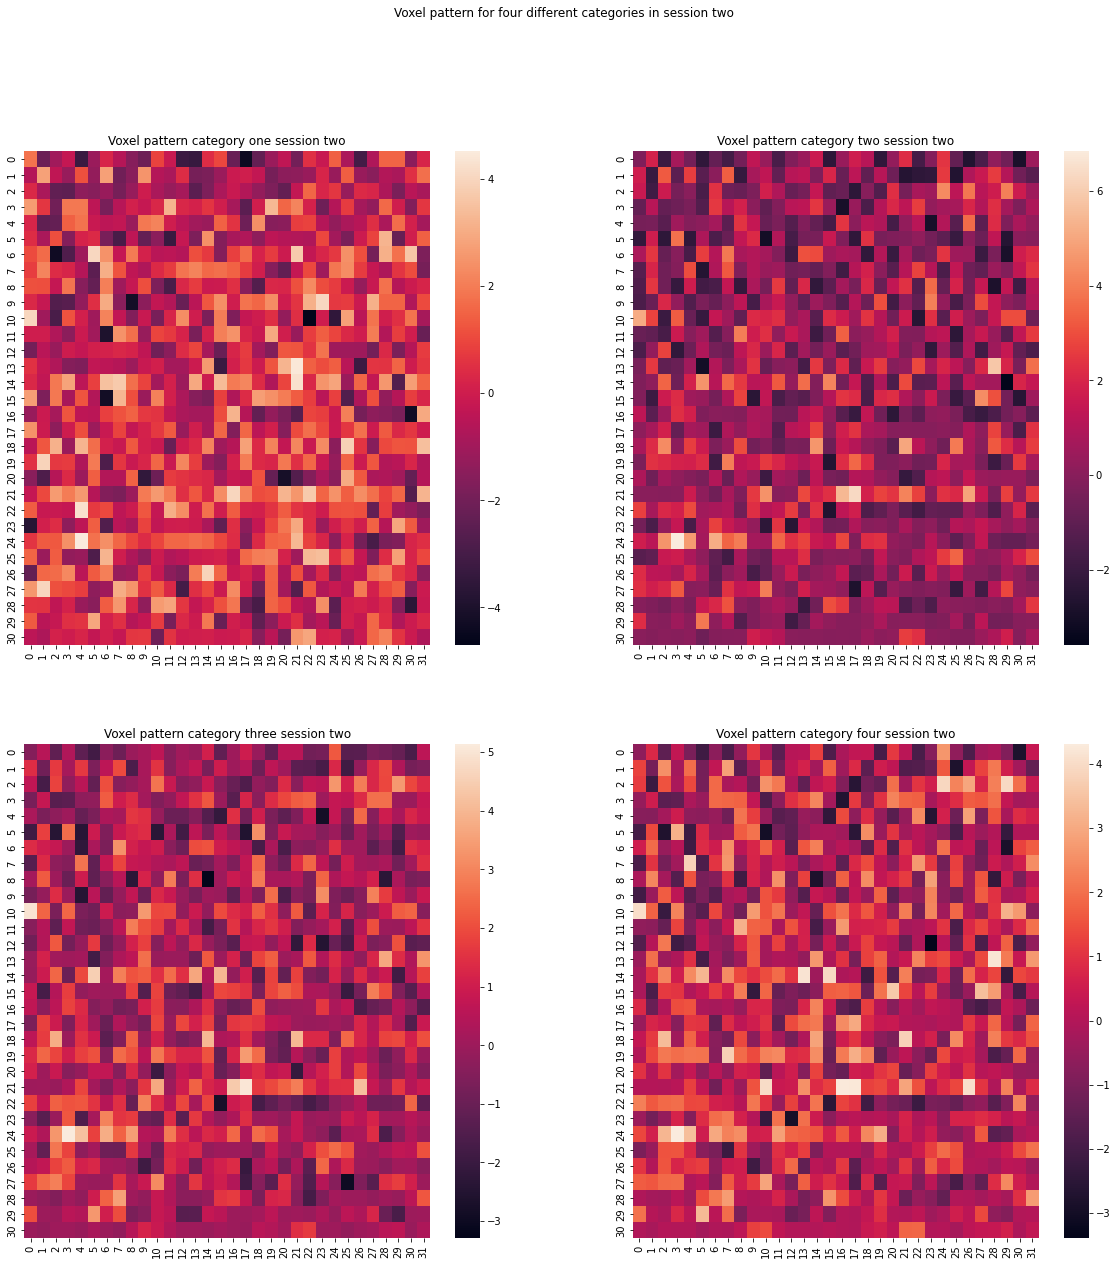

In [18]:
figure, axis = plt.subplots(2, 2,figsize=(20, 20))
im1 = sns.heatmap(X_11,ax=axis[0,0])
im2= sns.heatmap(X_21,ax=axis[0,1])
im3= sns.heatmap(X_31,ax=axis[1,0])
im4= sns.heatmap(X_41, ax=axis[1,1])

#figure.colorbar(orientation='vertical')
axis[0, 0].set_title("Voxel pattern category one session two")
axis[0, 1].set_title("Voxel pattern category two session two")
axis[1, 0].set_title("Voxel pattern category three session two")
axis[1, 1].set_title("Voxel pattern category four session two")

figure.suptitle('Voxel pattern for four different categories in session two')

Text(0.5, 0.98, 'Voxel pattern for four different categories in session three')

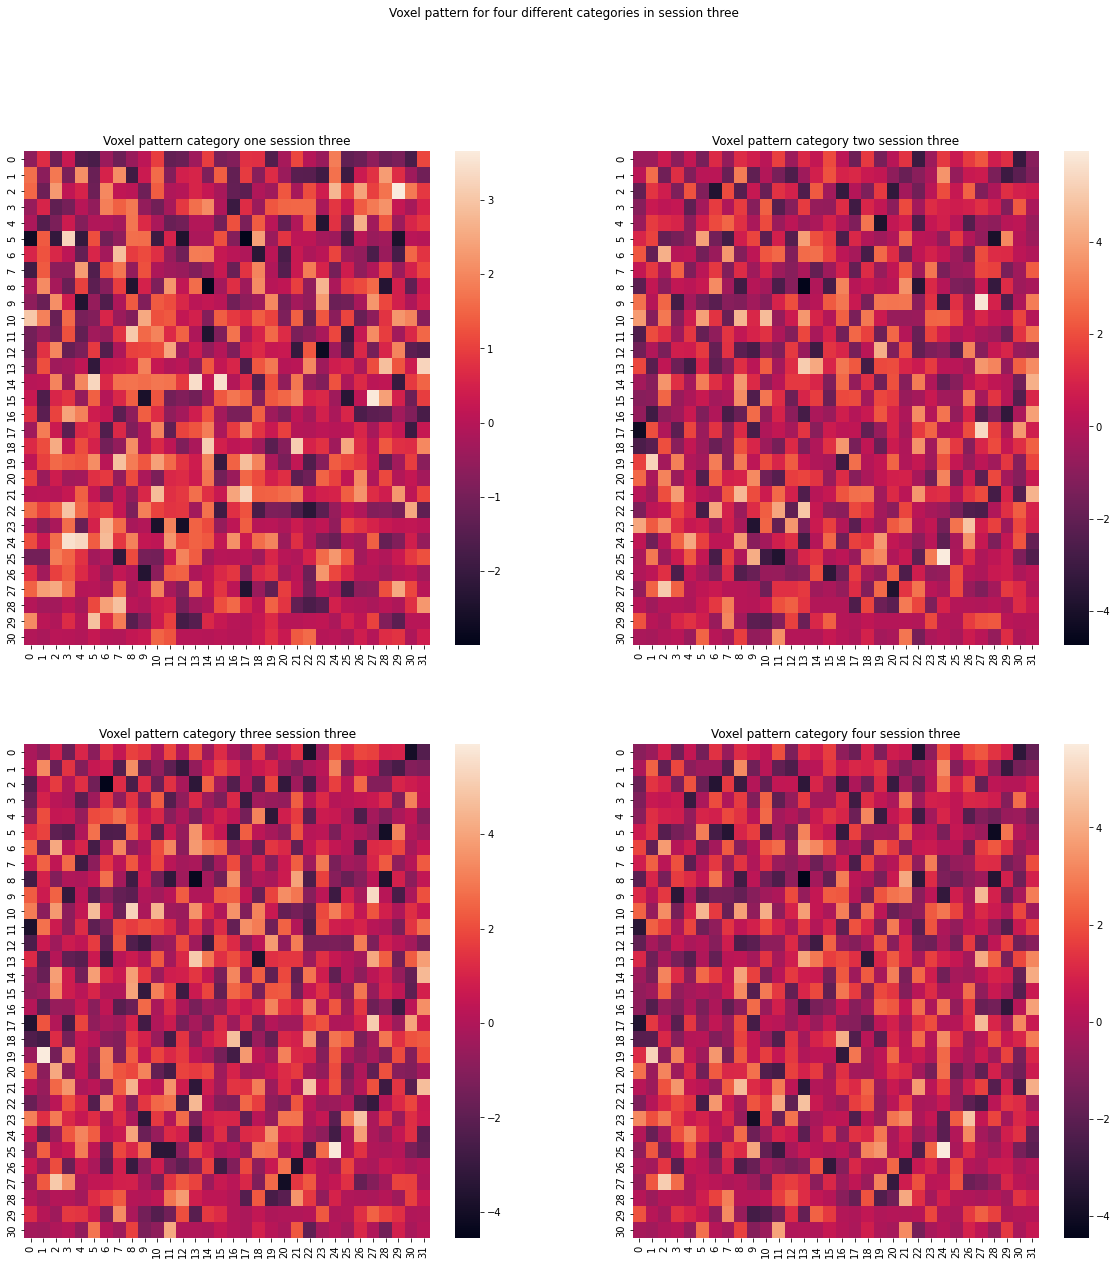

In [19]:
figure, axis = plt.subplots(2, 2,figsize=(20, 20))
im1 = sns.heatmap(X_12,ax=axis[0,0])
im2= sns.heatmap(X_22,ax=axis[0,1])
im3= sns.heatmap(X_32,ax=axis[1,0])
im4= sns.heatmap(X_42, ax=axis[1,1])

#figure.colorbar(orientation='vertical')
axis[0, 0].set_title("Voxel pattern category one session three")
axis[0, 1].set_title("Voxel pattern category two session three")
axis[1, 0].set_title("Voxel pattern category three session three")
axis[1, 1].set_title("Voxel pattern category four session three")

figure.suptitle('Voxel pattern for four different categories in session three')

Text(0.5, 0.98, 'Voxel pattern for four different categories in session four')

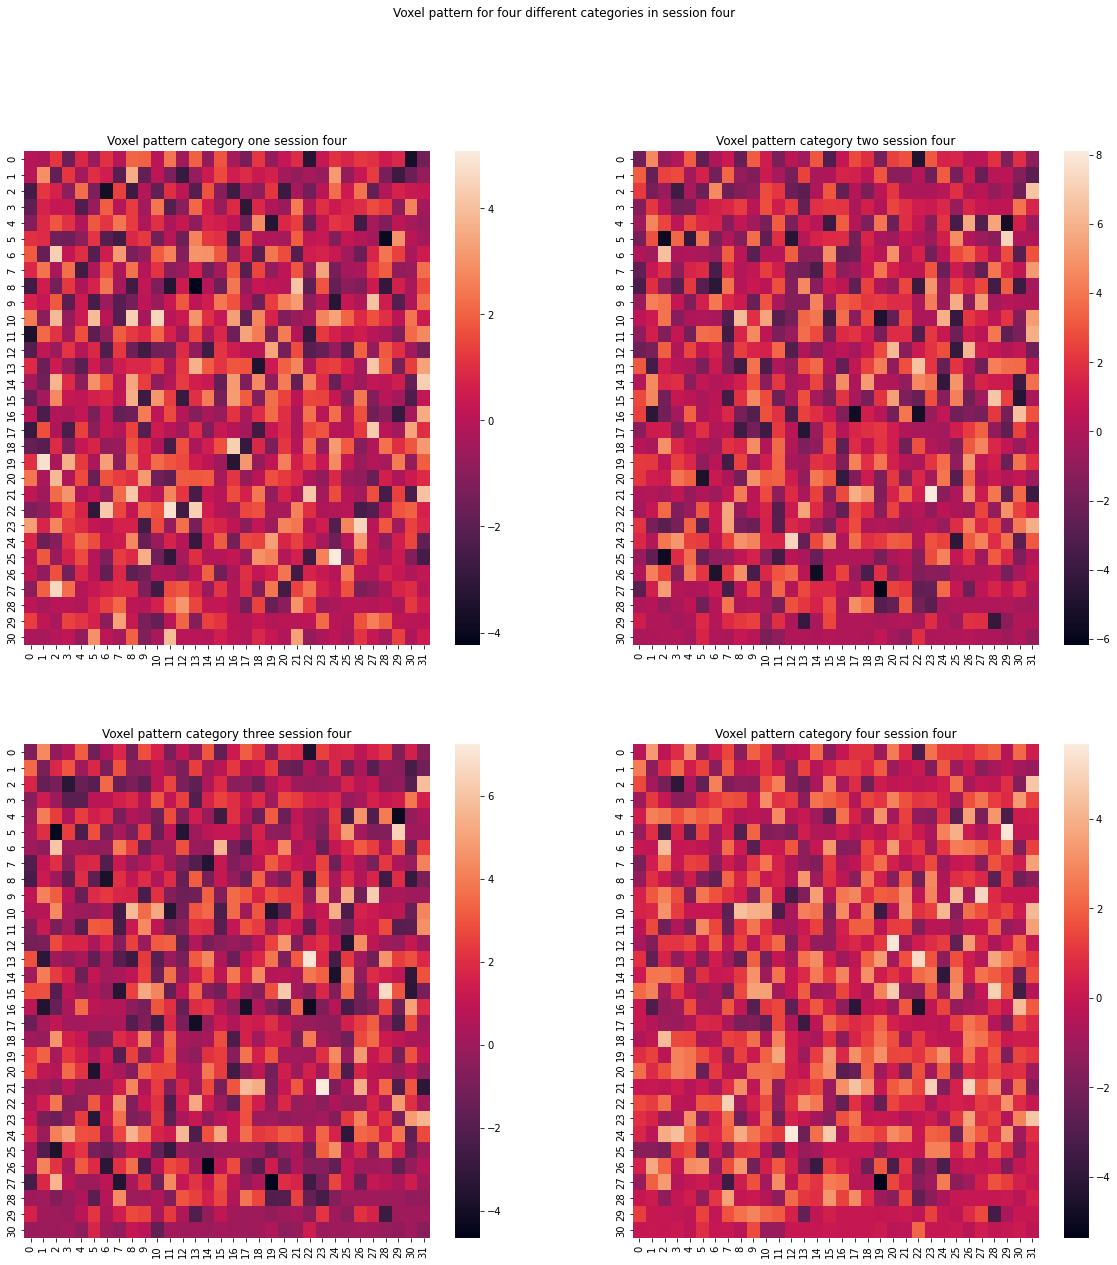

In [20]:
figure, axis = plt.subplots(2, 2,figsize=(20, 20))
im1 = sns.heatmap(X_13,ax=axis[0,0])
im2= sns.heatmap(X_23,ax=axis[0,1])
im3= sns.heatmap(X_33,ax=axis[1,0])
im4= sns.heatmap(X_43, ax=axis[1,1])

#figure.colorbar(orientation='vertical')
axis[0, 0].set_title("Voxel pattern category one session four")
axis[0, 1].set_title("Voxel pattern category two session four")
axis[1, 0].set_title("Voxel pattern category three session four")
axis[1, 1].set_title("Voxel pattern category four session four")

figure.suptitle('Voxel pattern for four different categories in session four')

Results:
(.......)

## **3.0 Logistic regression**

We now use sklearns train_test_split function to seperate our X and Y variables into training and testing data. We set test_size to 0.3, so we use 70% of the data for training and 30% for testing.

In [104]:
#np.random.shuffle(Y)
#len(Y)

104

In [116]:
 == Y_unique

/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [152]:
Y_unique = np.unique(Y)
Y_unique

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26])

In [196]:
from random import randrange
y_train = []
y_test = []


while len(y_test) < len(Y_unique):
    for cat in Y:
        chance = randrange(25)
        if chance >5:
            y_train.append(cat)
            #print('cat{} appended to training set'.format(cat))
            if len(y_train) == 79:
                y_train.remove(cat)
                continue
        if chance <=5:
            y_test.append(cat)
            #print('cat{} appended to testing set'.format(cat))
            if y_test.count(cat) > 1:
                y_test.remove(cat)
                #y_train.append(cat)
                 continue
                if len(y_test) != len(Y_unique):
                    continue
            
            
            

In [296]:
y_train = Y
y_train_list = y_train.tolist();


In [297]:
len(y_train_list)

104

In [328]:
np.random.shuffle(Y)
y_train = []
y_test = []


for cat in Y:
        if len(y_test) == len(Y_unique):
            y_train.append(cat)
        else:
            y_test.append(cat)
            if y_test.count(cat) > 1:
                y_test.remove(cat)
                y_train.append(cat)
                continue
            
                
                
            

In [334]:
y_test = np.array(y_test)
y_train = np.array(y_train)

In [336]:
y_train.shape

(78,)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, Y, test_size=0.2, random_state=42)


In [22]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train_s = scaler.fit_transform(X_train)


In [23]:
X_train_s

array([[-0.3558228 , -0.63958226,  1.13165862, ..., -0.11578786,
        -1.60880606,  0.09114724],
       [ 1.8552858 , -1.05193077, -0.57482656, ...,  0.2801733 ,
         0.44931839, -1.74568696],
       [ 0.13277712, -0.57818658,  0.92187236, ..., -0.86958563,
        -0.83096114, -0.64038265],
       ...,
       [-0.30056596,  1.6957902 , -0.47690695, ..., -2.13694816,
         1.70498979, -1.50036114],
       [-0.50645952,  0.05249426, -0.76455554, ...,  0.3130092 ,
        -0.46522445,  0.99430672],
       [-0.39164435,  1.51256017, -0.40426148, ..., -1.22820093,
         2.17538414, -0.87048034]])

In [24]:
X_train.shape

(83, 992)

In [25]:
y_train.shape

(83,)

In [26]:
y_test.shape

(21,)

We see that we will test our model on 72 rows of both X and Y values

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C = 1,multi_class='ovr', penalty = 'l1', solver = 'liblinear')


In [28]:
model.fit(X_train_s,y_train)

LogisticRegression(C=1, multi_class='ovr', penalty='l1', solver='liblinear')

In [29]:
model.score(scaler.transform(X_test), y_test)

0.047619047619047616

In [30]:
model.predict(X_train_s)

array([ 4, 23, 25, 19, 21, 16, 17, 15, 10,  8, 12, 26,  1,  3,  2,  6, 11,
        5, 14, 10, 17, 15,  9,  8, 18, 17, 18,  2, 20,  7, 26, 22, 24, 14,
       25,  4, 18, 13,  9,  4,  7, 16, 11, 13,  6,  3, 25, 19, 21, 22, 10,
       23, 19, 16,  7, 23, 12,  6, 24,  7, 20,  8, 12, 24, 12,  4,  2,  1,
       22,  3, 24, 10, 17, 23,  9,  5, 21,  9, 20, 15, 15, 26, 25])

In [31]:
y_train

array([ 4, 23, 25, 19, 21, 16, 17, 15, 10,  8, 12, 26,  1,  3,  2,  6, 11,
        5, 14, 10, 17, 15,  9,  8, 18, 17, 18,  2, 20,  7, 26, 22, 24, 14,
       25,  4, 18, 13,  9,  4,  7, 16, 11, 13,  6,  3, 25, 19, 21, 22, 10,
       23, 19, 16,  7, 23, 12,  6, 24,  7, 20,  8, 12, 24, 12,  4,  2,  1,
       22,  3, 24, 10, 17, 23,  9,  5, 21,  9, 20, 15, 15, 26, 25])

<AxesSubplot:>

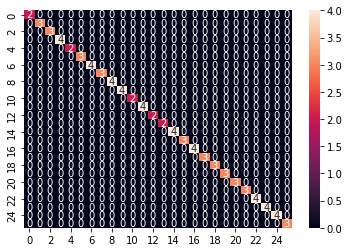

In [32]:
from sklearn.metrics import confusion_matrix

y_pred_train = model.predict(X_train_s)
cf_matrix_train = confusion_matrix(y_train, y_pred_train)

sns.heatmap(cf_matrix_train, annot = True)

<AxesSubplot:>

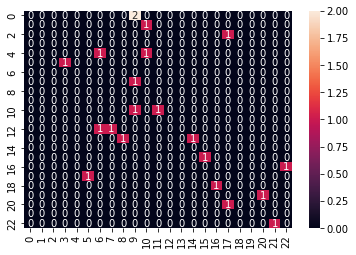

In [33]:
y_pred = model.predict(scaler.transform(X_test))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

In [34]:
coef = model.coef_
imp_f = []
imp_coef = []
j= 0

while j < 26:
    for feature, coefficient in enumerate(coef[j]):
        if coefficient > 0 or coefficient < 0:
            imp_f.append(feature)
            imp_coef.append(coefficient)
    j=j+1
    

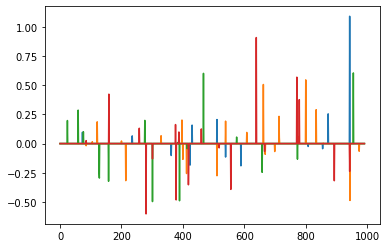

In [35]:
import matplotlib.pyplot as plt
plt.plot(coef[0])
plt.plot(coef[1])
plt.plot(coef[2])
plt.plot(coef[3])

Plotting the coefficients for category one, two and three

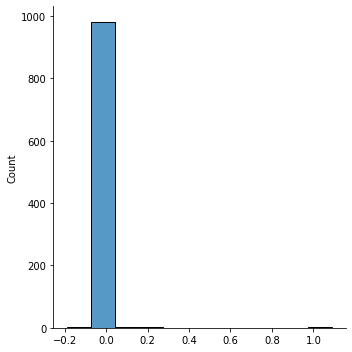

In [36]:
sns.displot(coef[0])

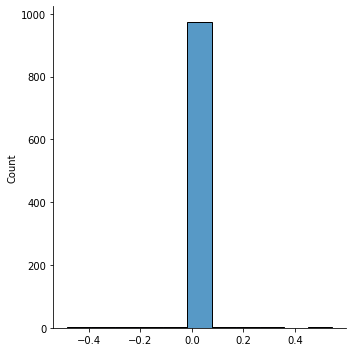

In [37]:
sns.displot(coef[1])

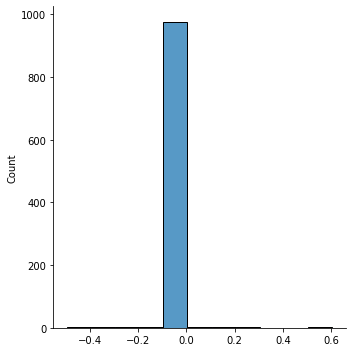

In [38]:
sns.displot(coef[2])

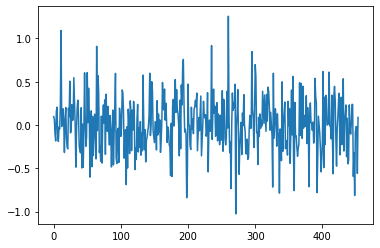

In [39]:
plt.plot(imp_coef)

In [40]:
len(imp_coef)

454

[ 3.  8.  1.  8.  2. 10.  5.  4.  2. 12.  7.  3. 12.  7.  5.  2.  4.  2.
  7.  0.  6. 15.  4.  1.  8.  1.  2.  6.  4.  0. 17.  6.  6. 13.  5.  4.
 10.  1.  3.  1.  8. 13.  1.  9.  9.  3.  8. 10.  8.  4.  6. 12.  3. 10.
  2.  5.  2.  9.  8.  1.  7.  0. 11.  4.  3.  7.  0.  5.  3.  5.  4.  6.
  8.  3.  2.  9.  7.  7.  8.  7.]


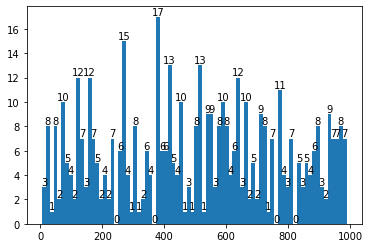

In [41]:
#plt.hist(imp,density=False, bins = 60);

counts, edges, bars = plt.hist(imp_f,density=False, bins = 80)
#              ^

plt.bar_label(bars);
print(counts)

In [42]:
un = np.unique(imp_f)
un.shape

(221,)

In [44]:
X_imp = X_[:,[un]]
X_imp.shape
X_imp = np.reshape(X_imp, (104,221))
X_imp.shape

(104, 221)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_imp, Y, test_size=0.2, random_state=42)

In [46]:
scaler = preprocessing.StandardScaler()
X_train_s = scaler.fit_transform(X_train)

In [47]:
#model = LogisticRegression(C= 10,multi_class='ovr', penalty = 'l1', solver = 'liblinear')

In [48]:
model.fit(X_train_s,y_train)

LogisticRegression(C=1, multi_class='ovr', penalty='l1', solver='liblinear')

In [49]:
model.score(scaler.transform(X_test), y_test)

0.047619047619047616

<AxesSubplot:>

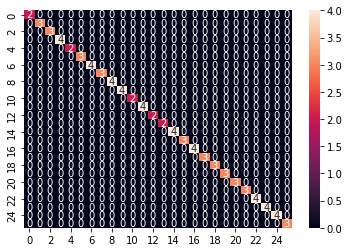

In [50]:
y_pred_train = model.predict(X_train_s)
cf_matrix_train = confusion_matrix(y_train, y_pred_train)

sns.heatmap(cf_matrix_train, annot = True)

<AxesSubplot:>

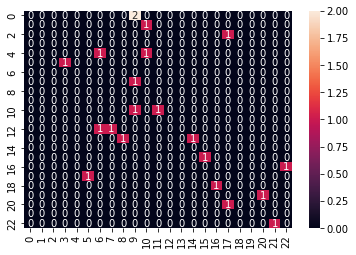

In [51]:
y_pred = model.predict(scaler.transform(X_test))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

## PCA

In [52]:
from sklearn.decomposition import PCA

In [79]:
pca = PCA() #n_components = 10
pca.fit(X_)

PCA()

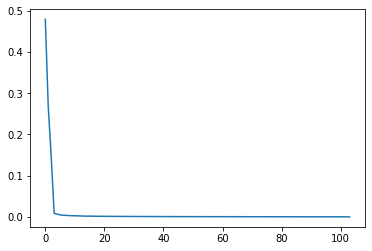

In [80]:
plt.plot(pca.explained_variance_ratio_)

In [55]:
X_transform = pca.transform(X_)

In [56]:
X_transform.shape

(104, 104)

In [57]:
X_nonses=X_transform[:,3:103]

Text(0, 0.5, 'PC 2')

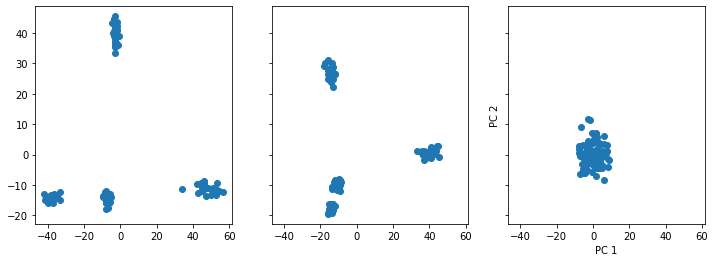

In [58]:
fig, ax =plt.subplots(figsize=(12, 4), ncols=3, sharey=True, sharex=True)
ax[0].scatter(X_transform[:, 0], X_transform[:, 1])
ax[1].scatter(X_transform[:, 1], X_transform[:, 2])
ax[2].scatter(X_transform[:, 3], X_transform[:, 4])
plt.xlabel('PC 1')
plt.ylabel('PC 2')

Text(0, 0.5, 'PC 2')

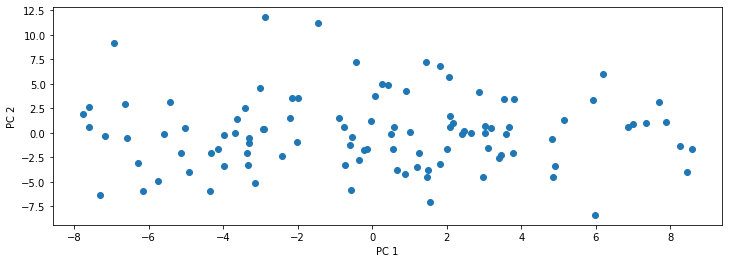

In [59]:
fig, ax =plt.subplots(figsize=(12, 4), ncols=1, sharey=True, sharex=True)
ax.scatter(X_nonses[:, 0], X_nonses[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [60]:
rand_X = np.random.normal(size=X_.shape)
pca_rand = PCA()
pca_rand.fit(rand_X)

PCA()

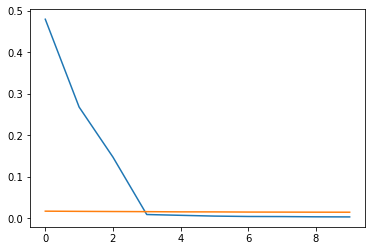

In [61]:
plt.plot(pca.explained_variance_ratio_[:10])
plt.plot(pca_rand.explained_variance_ratio_[:10])

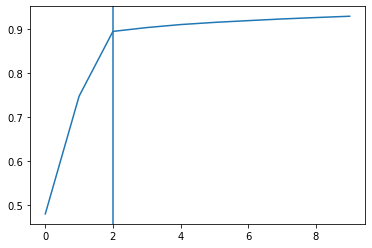

In [62]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)[:10])
plt.axvline(np.where(np.cumsum(pca.explained_variance_ratio_) >= .8)[0][0])

## Plotting non session specific components

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_nonses, Y, test_size=0.2, random_state=42)

In [64]:
X_train_noses = scaler.fit_transform(X_train)

In [65]:
model.fit(X_train_noses,y_train)

LogisticRegression(C=1, multi_class='ovr', penalty='l1', solver='liblinear')

In [66]:
model.score(scaler.transform(X_test), y_test)

0.047619047619047616

In [67]:
X_train_noses.shape

(83, 100)

In [68]:
transposed_X_ = X_.T
#transposed_X_.shape

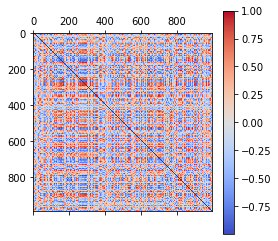

In [69]:
transposed_X_ = X_.T
corr_transposed =np.corrcoef(transposed_X_)
plt.matshow(corr_transposed, cmap='coolwarm') #vmin = np.min(transposed_X_), vmax=np.max(transposed_X_)
plt.colorbar()